Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


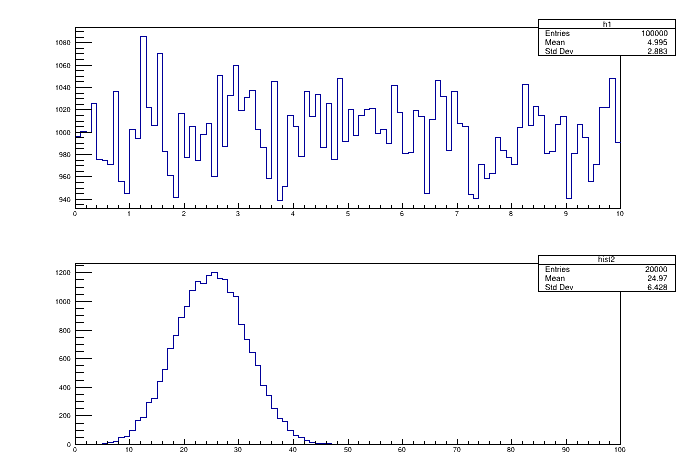

In [47]:
import ROOT

c1 = ROOT.TCanvas()
c1.Divide(1,2)
hist1 = ROOT.TH1F("h1", "", 100, 0, 10)
hist2 = ROOT.TH1F("hist2", "", 100, 0, 100)
rand = ROOT.TRandom3()

lista = []
for iev in range(100000):
    x = rand.Uniform(10)
    hist1.Fill(x)
    lista.append(x)
    
somas = []
for i in range(0, len(lista), 5):
    soma = sum(lista[i:i+5])
    somas.append(soma)

for elemento in somas:
    hist2.Fill(elemento)
    
    
c1.cd(1)
hist1.Draw()
c1.cd(2)
hist2.Draw()
c1.Draw()

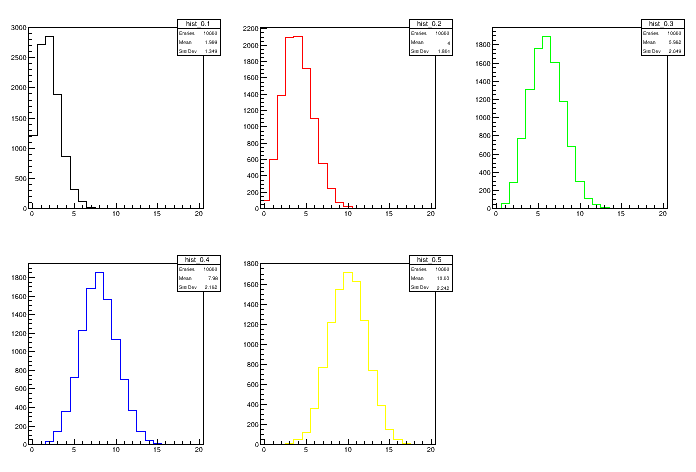

In [48]:
import ROOT

n = 20
p_values = [0.1, 0.2, 0.3, 0.4, 0.5]
num_trials = 10000

canvas = ROOT.TCanvas()
canvas.Divide(3, 2)

histograms = []
random_gen = ROOT.TRandom()

for i, p in enumerate(p_values):
    hist = ROOT.TH1F(f"hist_{p}", "", n+1, -0.5, n+0.5)
    histograms.append(hist)
    
    for _ in range(num_trials):
        k = random_gen.Binomial(n, p)
        hist.Fill(k)
    
    canvas.cd(i + 1)
    hist.SetLineColor(i + 1)
    hist.Draw()

canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      41.6549
NDf                       =           37
Edm                       =    2.056e-08
NCalls                    =           57
Constant                  =      798.635   +/-   9.6638      
Mean                      =      5.00374   +/-   0.00999682  
Sigma                     =     0.994974   +/-   0.00675606   	 (limited)


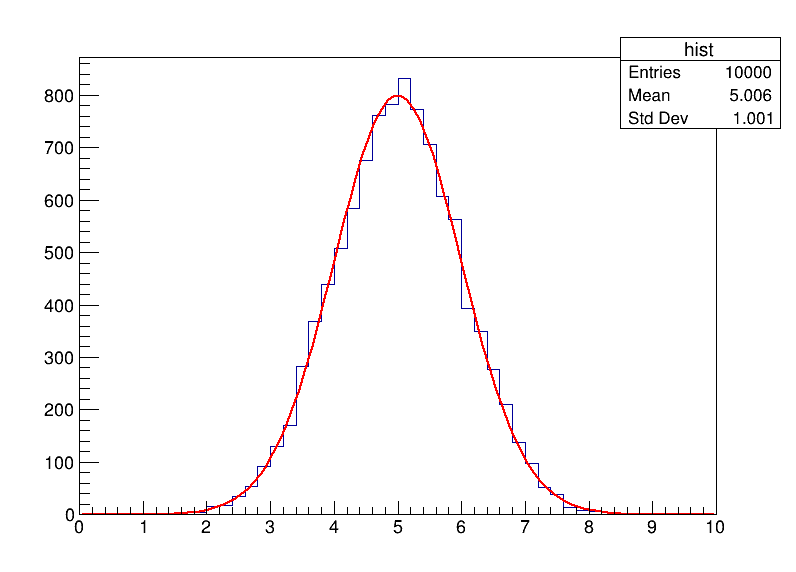

In [49]:
import ROOT

mean = 5.0
sigma = 1.0
num_points = 10000

hist = ROOT.TH1F("hist", "", 50, mean - 5*sigma, mean + 5*sigma)

random_gen = ROOT.TRandom()
for _ in range(num_points):
    value = random_gen.Gaus(mean, sigma)
    hist.Fill(value)

gaussian_fit = ROOT.TF1("gaussian_fit", "gaus", mean - 5*sigma, mean + 5*sigma)
hist.Fit(gaussian_fit, "R")

canvas = ROOT.TCanvas("canvas", "Ajuste Gaussiano", 800, 600)
hist.Draw()
canvas.Draw()

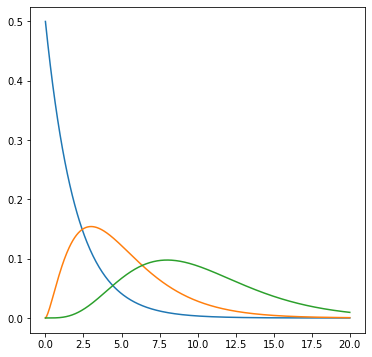

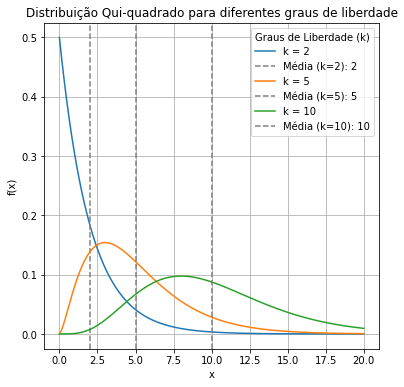

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Valores para diferentes graus de liberdade
k_values = [ 2, 5, 10]  # graus de liberdade
x = np.linspace(0, 20, 500)  # valores de x para o gráfico

# Criar o gráfico
plt.figure(figsize=(6, 6))
for k in k_values:
    plt.plot(x, chi2.pdf(x, k), label=f'k = {k}')


plt.figure(figsize=(6, 6))
for k in k_values:
    # Calcular e plotar a distribuição
    plt.plot(x, chi2.pdf(x, k), label=f'k = {k}')

    # Calcular a média da distribuição qui-quadrado, que é igual a k
    mean = k
    plt.axvline(mean, color='gray', linestyle='--', label=f'Média (k={k}): {mean}')

# Configurações do gráfico
plt.title("Distribuição Qui-quadrado para diferentes graus de liberdade")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(title="Graus de Liberdade (k)")
plt.grid(True)
plt.show()

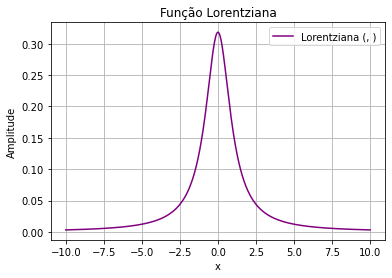

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros da Lorentziana
x0 = 0       # posição central
gamma = 1    # largura à meia-altura

# Gerando valores x para a função Lorentziana
x = np.linspace(x0 - 10*gamma, x0 + 10*gamma, 1000)
y = 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# Criando o gráfico
plt.plot(x, y, label='Lorentziana (, )', color='purple')

# Personalizando o gráfico
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Função Lorentziana')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        0.027
NDf                       =            3
Edm                       =  6.21096e-25
NCalls                    =           32
p0                        =         1.39   +/-   0.0994987   
p1                        =         0.75   +/-   0.03        


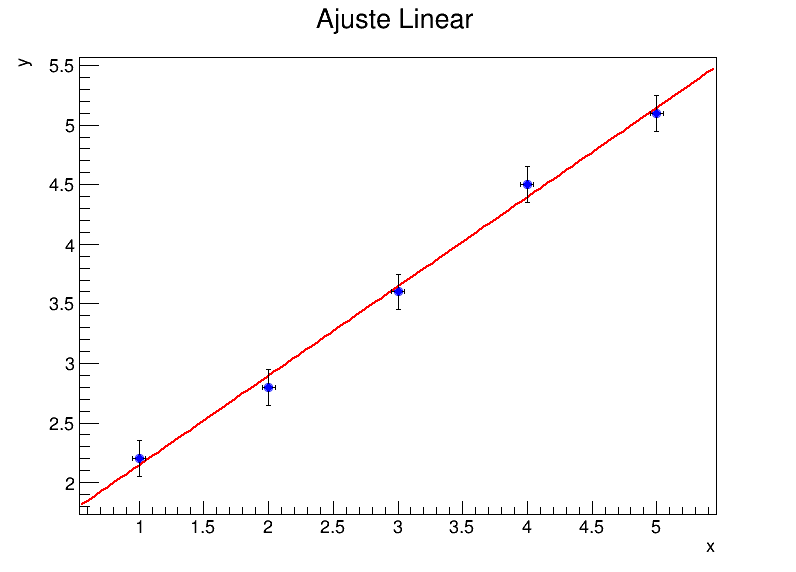

In [52]:
import numpy as np
import ROOT

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1])
err_x_data = np.array([0.05, 0.05, 0.05, 0.05, 0.05])  
err_y_data = np.array([0.15, 0.15, 0.15, 0.15, 0.15])  

c1 = ROOT.TCanvas("c1", "Ajuste Linear", 800, 600)
graph = ROOT.TGraphErrors(len(x_data))

for i in range(len(x_data)):
    graph.SetPoint(i, x_data[i], y_data[i])
    graph.SetPointError(i, err_x_data[i], err_y_data[i])

graph.SetTitle("Ajuste Linear")
graph.GetXaxis().SetTitle("x")
graph.GetYaxis().SetTitle("y")
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.Draw("AP")

fit_function = ROOT.TF1("fit_function", "[0] + [1]*x", min(x_data), max(x_data))
graph.Fit(fit_function, "W")

intercept = fit_function.GetParameter(0)
slope = fit_function.GetParameter(1)

c1.Draw()

O melhor grau do polinômio é o de grau 2 com AIC = 2.53
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6.11809
NDf                       =            3
Edm                       =  3.10641e-07
NCalls                    =          140
p0                        =       -81.37   +/-   215.826     
p1                        =      169.812   +/-   432.421     
p2                        =     -121.865   +/-   298.377     
p3                        =      40.1722   +/-   90.4184     
p4                        =     -4.36171   +/-   12.0935     
p5                        =     0.260555   +/-   0.578746    
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6.11809
NDf                       =            3
Edm                       =  4.99098e-07
NCalls                    =          140
p0                        =      -81.399   +/-   215.826     
p1                        =      169.872

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


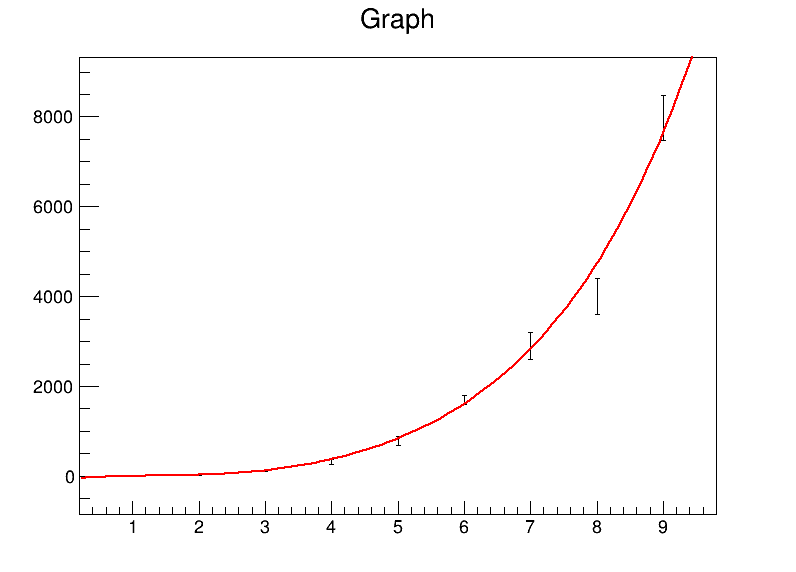

In [54]:
import numpy as np
import ROOT

def aic(n, rss, num_params):
    return n * np.log(rss / n) + 2 * num_params

x = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.asarray([3, 29, 129, 320, 781, 1700, 2901, 4000, 7981])
sy = np.asarray([10, 10, 10, 50, 100, 100, 290, 400, 500])

graph = ROOT.TGraphErrors(len(x))

for i in range(len(x)):
    graph.SetPoint(i, x[i], y[i])
    graph.SetPointError(i, 0, sy[i])

aic_values = []

for degree in range(2, 6):
    poly_func = ROOT.TF1("poly_func", f"[0] + [1]*x + [2]*x^2 + [3]*x^3 + [4]*x^4 + [5]*x^5", 0, 10)

    for i in range(degree + 1):
        poly_func.SetParameter(i, 1)

    graph.Fit(poly_func, "R")

    rss = 0
    for i in range(len(x)):
        rss += ((y[i] - poly_func.Eval(x[i])) / sy[i]) ** 2
    
    num_params = degree + 1
    
    aic_value = aic(len(x), rss, num_params)
    aic_values.append((degree, aic_value))

    canvas = ROOT.TCanvas("canvas", "Ajuste de Polinômio", 800, 600)
    graph.Draw("AP")
    poly_func.Draw("same")
    canvas.Draw()
    
best_degree, best_aic = min(aic_values, key=lambda x: x[1])
print(f'O melhor grau do polinômio é o de grau {best_degree} com AIC = {best_aic:.2f}')